<a href="https://colab.research.google.com/github/O-suke12/MachineLearning/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import pandas as pd

In [215]:
np.random.seed(10)
n = 10
X = np.random.rand(n,2)*10

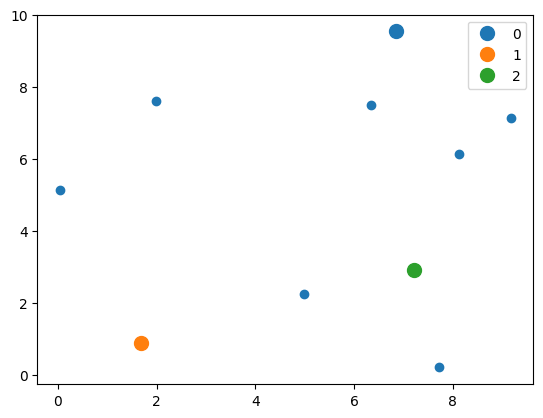

In [227]:
num_centroid = 3
centroid = np.random.choice(n, size=num_centroid, replace=False)
center_loc = np.array([X[i] for i in centroid])

d = {'number': [], 'group': [], "X":[], "Y":[]}
df = pd.DataFrame(data=d)
for i in range(num_centroid):
  row =  pd.DataFrame({'number': [centroid[i]], 'group': [i], "X": X[centroid[i],0], "Y":X[centroid[i],1]})
  df = pd.concat((df,row), ignore_index=True)
df["number"] = df["number"].astype(int)
df["group"] = df["group"].astype(int)


df2 = df.groupby("group")
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
for name, group in df2:
  ax.plot(group.X, group.Y, marker='o', linestyle='', ms=10, label=name)
ax.legend()
plt.show()

In [176]:
center_loc[0]

array([4.67010968, 0.31041156])

In [263]:
df[df["number"]==4]["group"].item()

1

[[6.85359818 9.53393346]
 [1.69110837 0.88339814]
 [7.21755317 2.91876068]]
False


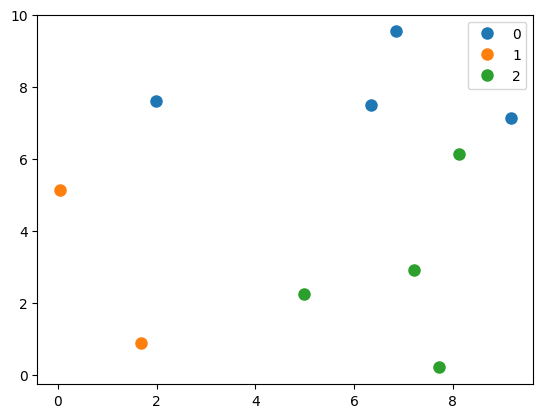

[[6.0871126  7.94325931]
 [0.86529551 3.00266039]
 [7.01050984 2.87487682]]
False


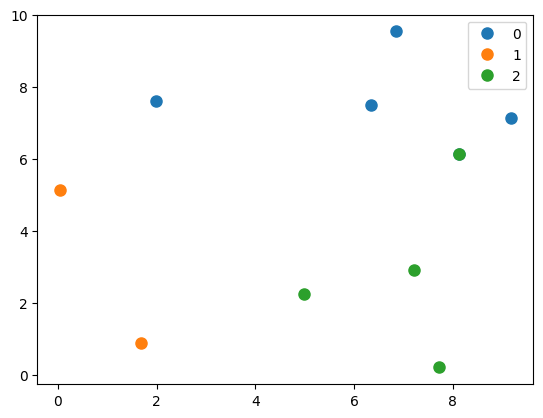

[[6.494932   7.57965958]
 [0.86529551 3.00266039]
 [7.01050984 2.87487682]]


ValueError: ignored

In [264]:
previous_loc = np.array([])
while(1):
  previous_loc = np.copy(center_loc)
  print(center_loc)
  for i in range(n):
    cluster_num = np.argmin([np.sum(pow(X[i]-center_loc[j],2)) for j in range(num_centroid)])
    row =  pd.DataFrame({'number': [i], 'group': [cluster_num], "X": X[i,0], "Y":X[i,1]})
    if df[df["number"]==i]["group"].empty or df[df["number"]==i]["group"].item() !=cluster_num :
      df = pd.concat((df,row), ignore_index=True)
  
  for i in range(num_centroid):
    cluster = df[df["group"]==i]
    center_loc[i] = sum([X[j] for j in cluster["number"]])/len(df[df["group"]==i])
  
  print(np.all(previous_loc == center_loc))
  if np.all(previous_loc == center_loc):
    break
  df2 = df.groupby("group")
  fig, ax = plt.subplots()
  for name, group in df2:
    ax.plot(group.X, group.Y, marker='o', linestyle='', ms=8, label=name)
  ax.legend()
  plt.show()